In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [7]:
test = pd.read_csv('/content/test.csv')
df=pd.read_csv("/content/train.csv")

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [12]:
df.loc[(df['price_range'] ==0), 'price_range'] = 'Low Cost'
df.loc[(df['price_range'] ==1), 'price_range'] = 'Medium Cost'
df.loc[(df['price_range'] ==2), 'price_range'] = 'High Cost'
df.loc[(df['price_range'] ==3), 'price_range'] = 'Very High Cost'

In [15]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Medium Cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,High Cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,High Cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,High Cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,Medium Cost
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,Medium Cost
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,Very High Cost
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,Low Cost
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,Low Cost
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,Low Cost


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [18]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 2000 ,and number of columns are : 21


In [20]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

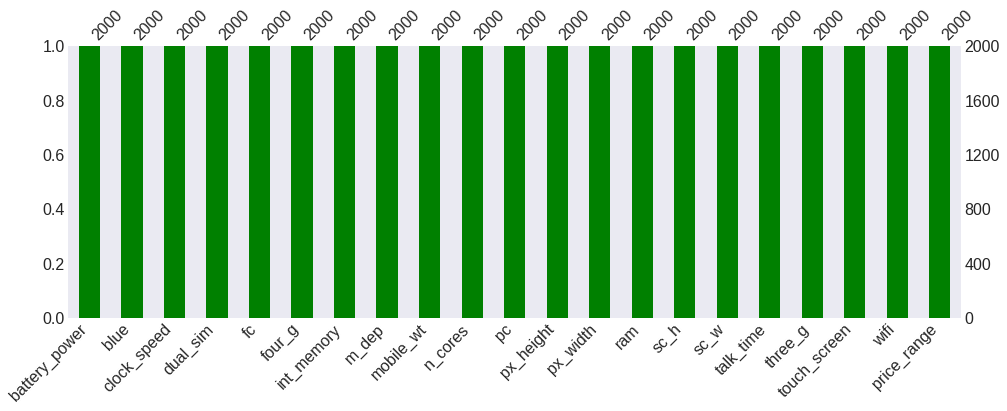

In [21]:
msno.bar(df, figsize = (16,5),color = "green")
plt.show()

In [22]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Medium Cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,High Cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,High Cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,High Cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,Medium Cost


In [23]:
df.ram.value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

In [24]:
df.blue.value_counts()
print('\n 1 there is bluetooth=',df.blue.value_counts()[0],"\n",
      '0 there is not bluetooth=',df.blue.value_counts()[1])


 1 there is bluetooth= 1010 
 0 there is not bluetooth= 990


In [25]:
df.dual_sim.value_counts()
print('\n 1 there is dual sim=',df.dual_sim.value_counts()[0],"\n",
      '0 there is not dual sim=',df.dual_sim.value_counts()[1])


 1 there is dual sim= 981 
 0 there is not dual sim= 1019


In [26]:
df.four_g.value_counts()
print('\n 0 there is 4G =',df.four_g.value_counts()[0],"\n",
      '1 there is not 4G=',df.four_g.value_counts()[1])


 0 there is 4G = 957 
 1 there is not 4G= 1043


In [27]:
df.three_g.value_counts()
print('\n 0 there is not 3G =',df.three_g.value_counts()[0],"\n",
      '1 there is 3G=',df.three_g.value_counts()[1])


 0 there is not 3G = 477 
 1 there is 3G= 1523


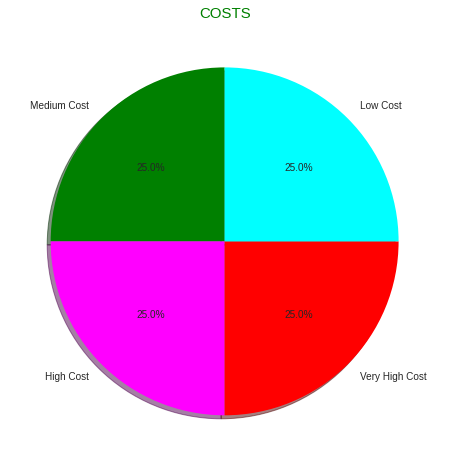

In [30]:
labels = df["price_range"].value_counts().index
sizes = df["price_range"].value_counts()
colors = ['green','magenta','red','cyan',"orange","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

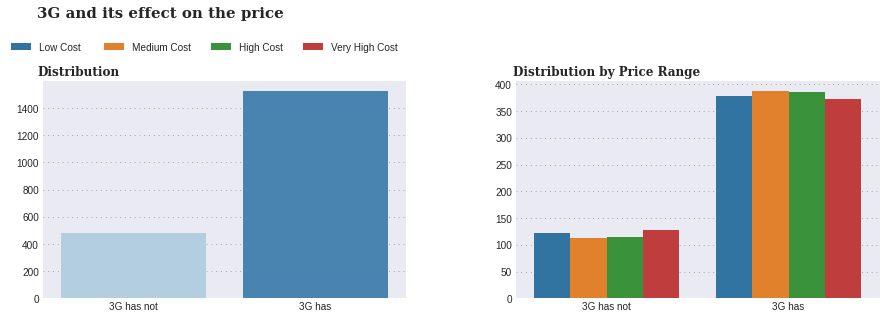

In [34]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'3G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# 3G and its effect on price
sns.countplot(x='three_g',
           data=df,
            palette='Blues',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.set_xticklabels(["3G has not","3G has"])
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xlabel("")
ax0.set_ylabel("")

#Distrubution by price
sns.countplot(x='three_g',
             data=df,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["3G has not","3G has"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

In [35]:
pd.DataFrame(data = [df.groupby('price_range')['wifi'].value_counts(), 
                     df.groupby('price_range')['blue'].value_counts(),
                     df.groupby('price_range')['dual_sim'].value_counts(),
                     df.groupby('price_range')['three_g'].value_counts(),
                     df.groupby('price_range')['four_g'].value_counts(),
                     df.groupby('price_range')['touch_screen'].value_counts()],  

             index=["wifi", "blue","dual_sim","Three_g","four_g","Touch_screen"]).T.style.background_gradient(cmap='gist_yarg_r')

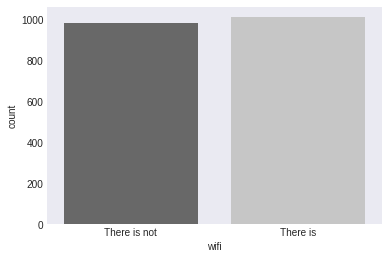

In [36]:
a=sns.countplot(data=df,x="wifi",palette="Greys_r")
a.set_xticklabels(["There is not","There is"])
plt.show()

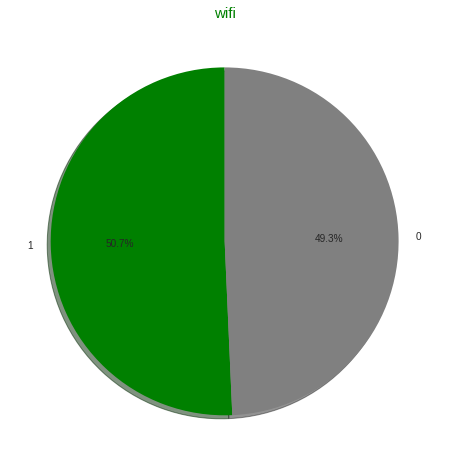

In [37]:
labels = df["wifi"].value_counts().index
sizes = df["wifi"].value_counts()
colors = ['green','gray','magenta','cyan',"orange","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('wifi',color = 'green',fontsize = 15)
plt.show()


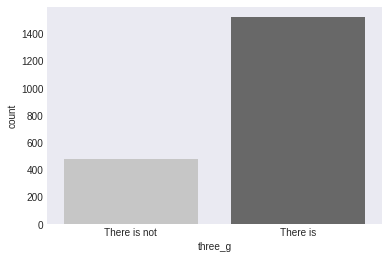

In [38]:
a=sns.countplot(data=df,x="three_g",palette="Greys")
a.set_xticklabels(["There is not","There is"])
plt.show()

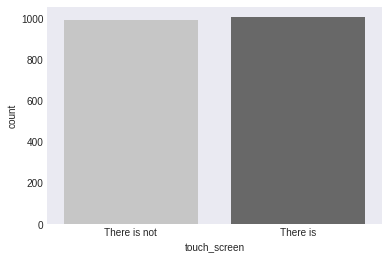

In [39]:
a=sns.countplot(data=df,x="touch_screen",palette="Greys")
a.set_xticklabels(["There is not","There is"])
plt.show()

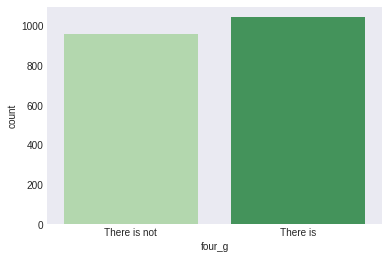

In [40]:
a=sns.countplot(data=df,x="four_g",palette="Greens")
a.set_xticklabels(["There is not","There is"])
plt.show()

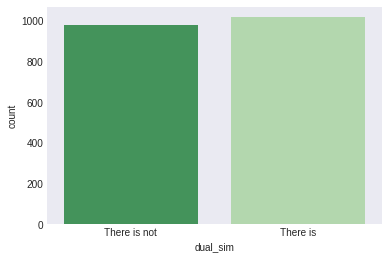

In [41]:
a=sns.countplot(data=df,x="dual_sim",palette="Greens_r")
a.set_xticklabels(["There is not","There is"])
plt.show()

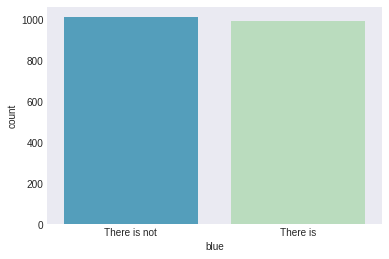

In [42]:
a=sns.countplot(data=df,x="blue",palette="GnBu_r")
a.set_xticklabels(["There is not","There is"])
plt.show()

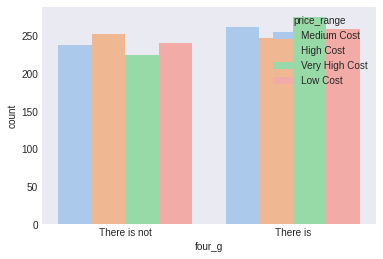

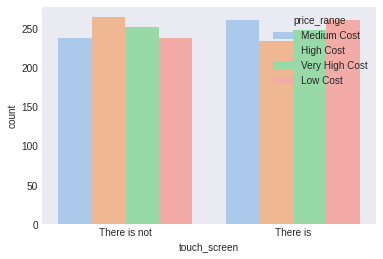

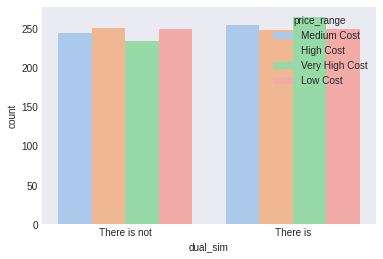

In [43]:
binary_col = ['four_g','touch_screen','dual_sim']
for i in binary_col:
    ax = sns.countplot(x=i, hue='price_range',data=df,palette='pastel')
    ax.set_xticklabels(["There is not","There is"])
    plt.show()

In [44]:
px.box(df,x='price_range',y='ram',
       color='price_range',template='ggplot2',
       labels={'price_range':'Price Range',
               'ram':'ram'},
       title="<b>Effect of Ram Capacity on Price")

In [45]:
px.box(df,x='price_range',y='battery_power',
       color='price_range',template='ggplot2',
       labels={'price_range':'price_range',
               'battery_power':'battery_power'},
       title='<b>Battery power by price')

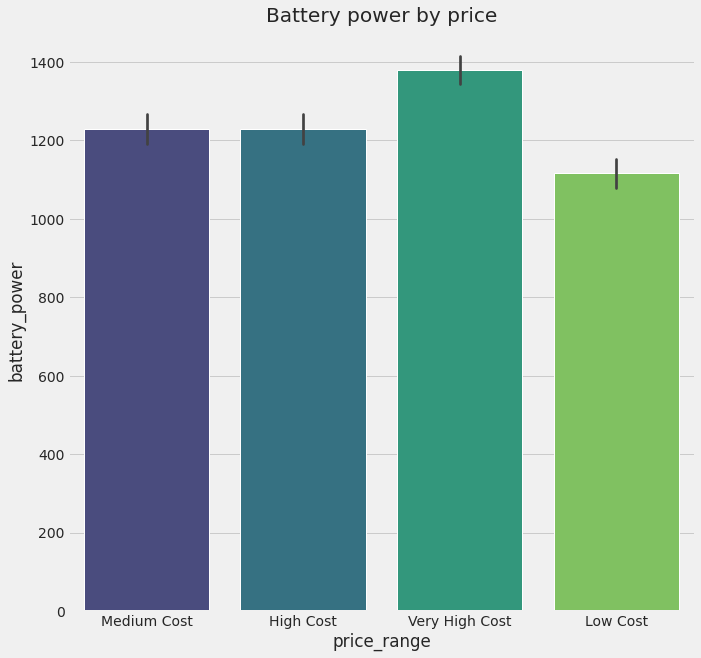

In [46]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.title("Battery power by price")
sns.set(font_scale=1)
sns.barplot(data=df, y="battery_power",x="price_range",palette="viridis")
plt.show()

# RESULT

**💰 As the battery power increases, we can say that the price increases.**

**💰 The higher the RAM capacity, the higher the price.**

**💰 The price goes up when the phone has 3G.**

**💰 The percentages of cheap, medium, expensive, very expensive phones in the dataset are equal.**
